# TIME SERIES ANALYSIS - USING S&P 500

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
raw_csv_data = pd.read_csv('index2018.csv')
df_comp = raw_csv_data.copy()

In [3]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [4]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [5]:
df_comp.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

## Plotting the Data

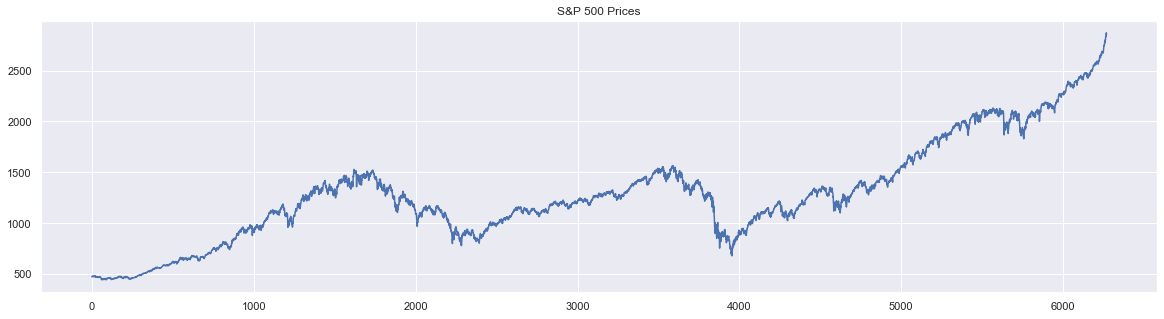

In [6]:
df_comp.spx.plot(figsize = (20,5),title = 'S&P 500 Prices')
plt.show()

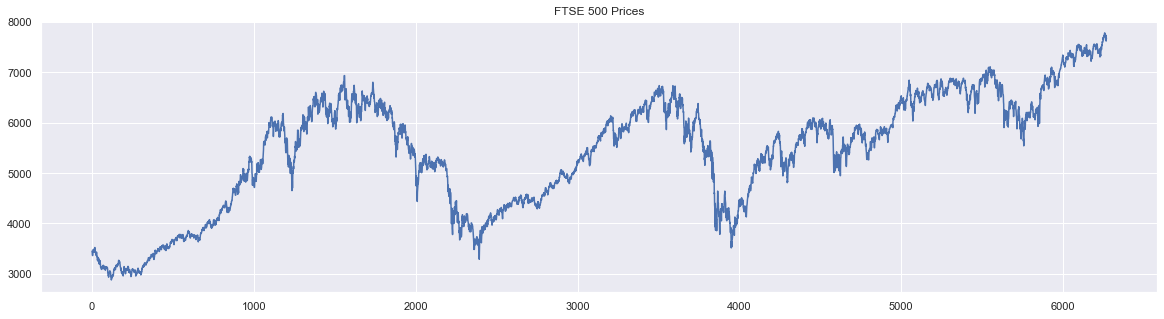

In [7]:
df_comp.ftse.plot(figsize = (20,5),title = 'FTSE 500 Prices')
plt.show()

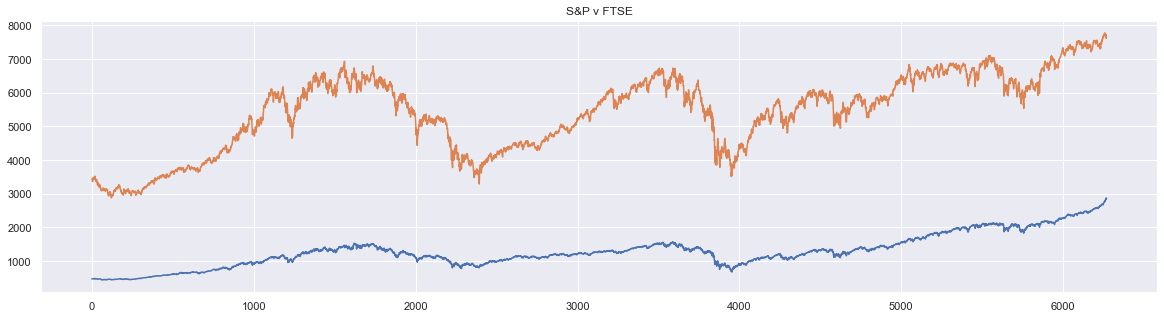

In [8]:
df_comp.spx.plot(figsize = (20,5),title = 'S&P 500 Prices')
df_comp.ftse.plot(figsize = (20,5),title = 'FTSE 500 Prices')
plt.title('S&P v FTSE')
plt.show()


## Quantile - Quantile Plot ( QQ Plot )

In [9]:
import scipy.stats
import pylab

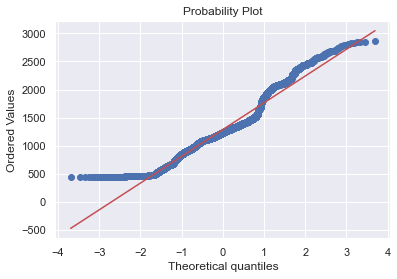

In [10]:
scipy.stats.probplot(df_comp.spx, plot=pylab)
pylab.show()

## Convert to DateTime

In [11]:
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)

In [12]:
df_comp

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.900000,2224.95,3445.980000,18124.01
1,1994-01-10,475.270000,2225.00,3440.580000,18443.44
2,1994-01-11,474.130000,2228.10,3413.770000,18485.25
3,1994-01-12,474.170000,2182.06,3372.020000,18793.88
4,1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...,...
6264,2018-01-23,2839.130362,13559.60,7731.827774,24124.15
6265,2018-01-24,2837.544008,13414.74,7643.428966,23940.78
6266,2018-01-25,2839.253031,13298.36,7615.839954,23669.49
6267,2018-01-26,2872.867839,13340.17,7665.541292,23631.88


In [13]:
df_comp.date.describe()

count                    6269
unique                   6269
top       1999-08-23 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

## Set Date to index

In [14]:
df_comp.set_index('date', inplace=True)

In [15]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


## Setting a frequency

In [16]:
# b --> Business Days, h --> hourly, d --> Daily, m --> Monthly, a --> Annual
 
df_comp = df_comp.asfreq('d')
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25


In [17]:
# b --> Business Days, h --> hourly, d --> Daily, m --> Monthly, a --> Annual
 
df_comp = df_comp.asfreq('b')
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


## Handling missing Values

In [18]:
df_comp.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [19]:
df_comp.spx = df_comp.spx.fillna(method = "ffill")
df_comp.ftse = df_comp.ftse.fillna(method = "bfill")
df_comp.dax = df_comp.dax.fillna(value = df_comp.dax.mean())
df_comp.nikkei = df_comp.nikkei.fillna(method = "ffill")

## Simplifying the dataset 

In [20]:
df_comp_copy = df_comp


In [21]:
df_comp['market_value'] = df_comp.spx
df_comp.head()

,spx,dax,ftse,nikkei,market_value
date,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,469.90
1994-01-10,475.27,2225.00,3440.58,18443.44,475.27
1994-01-11,474.13,2228.10,3413.77,18485.25,474.13
1994-01-12,474.17,2182.06,3372.02,18793.88,474.17
1994-01-13,472.47,2142.37,3360.01,18577.26,472.47


In [22]:
del df_comp['spx'], df_comp['dax'], df_comp['ftse'], df_comp['nikkei']

df_comp.head()

,market_value
date,
1994-01-07,469.90
1994-01-10,475.27
1994-01-11,474.13
1994-01-12,474.17
1994-01-13,472.47


## Splitting the data

In [23]:
size = int(0.8*len(df_comp))

In [24]:
df = df_comp.iloc[:size]
df.tail()

,market_value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [25]:
df_test = df_comp.iloc[size:]
df_test.head()

,market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


## White Noise

In [26]:
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))

In [27]:
df['wn'] = wn

In [28]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1086.290112
std,292.559287,288.053452
min,438.920000,134.472797
25%,914.620000,890.803265
50%,1144.650000,1085.600348
75%,1316.280729,1284.345395
max,1570.252238,2179.477320


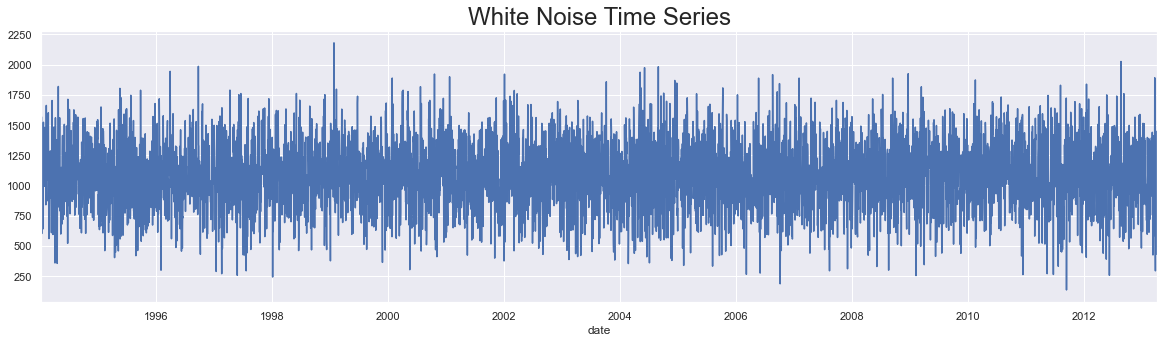

In [29]:
df.wn.plot(figsize = (20,5))
plt.title('White Noise Time Series', size = 24)
plt.show()

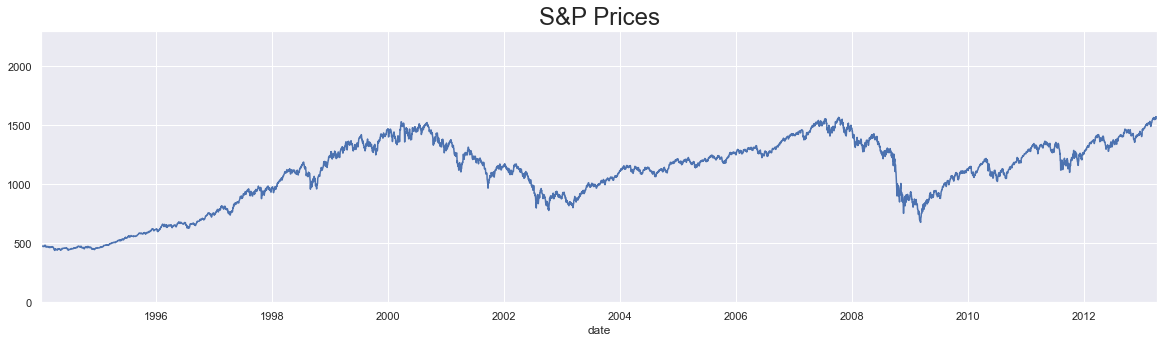

In [30]:
df.market_value.plot(figsize = (20,5))
plt.title('S&P Prices', size = 24)
plt.ylim(0,2300)
plt.show()

## Random Walk

In [31]:
rw = pd.read_csv('RandWalk.csv')
rw.head()

,date,price
0,07/01/1994,1122.139662
1,08/01/1994,1135.238562
2,09/01/1994,1109.897831
3,10/01/1994,1080.347860
4,11/01/1994,1082.095245


In [32]:
rw.date = pd.to_datetime(rw.date, dayfirst=True)
rw.set_index("date", inplace=True)
rw = rw.asfreq('b')

In [33]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [34]:
df['rw'] = rw.price

In [35]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,875.655166,1122.139662
1994-01-10,475.27,1567.690448,1080.347860
1994-01-11,474.13,1035.311488,1082.095245
1994-01-12,474.17,601.716408,1083.639265
1994-01-13,472.47,1408.827776,1067.146255


In [36]:
df = df.dropna()

In [37]:
df.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,875.655166,1122.139662
1994-01-10,475.27,1567.690448,1080.347860
1994-01-11,474.13,1035.311488,1082.095245
1994-01-12,474.17,601.716408,1083.639265
1994-01-13,472.47,1408.827776,1067.146255


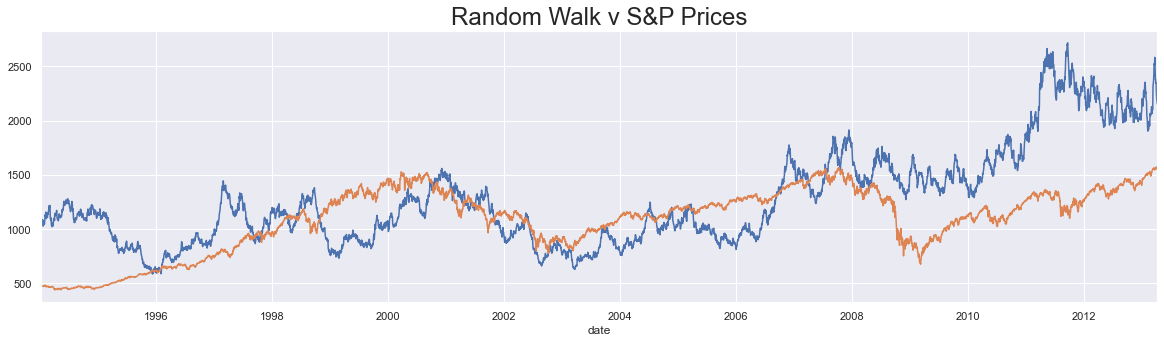

In [38]:
df.rw.plot(figsize = (20,5))
df.market_value.plot(figsize = (20,5))
plt.title('Random Walk v S&P Prices', size = 24)
#plt.ylim(0,2300)
plt.show()

## Stationarity

In [39]:
sts.adfuller(df.market_value)

(-1.7369847452352438,
 0.4121645696770621,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [40]:
sts.adfuller(df.wn)

(-70.66035948062022,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70654.53330550113)

In [41]:
sts.adfuller(df.rw)

(-1.328607392768972,
 0.6159849181617384,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

## Seasonality

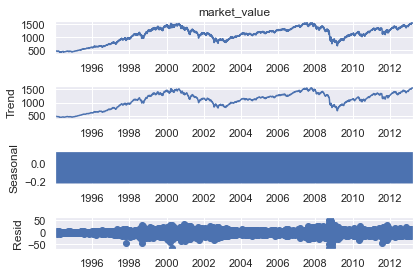

In [42]:
s_dec_additive = seasonal_decompose(df.market_value, model = "additive")
s_dec_additive.plot()
plt.show()

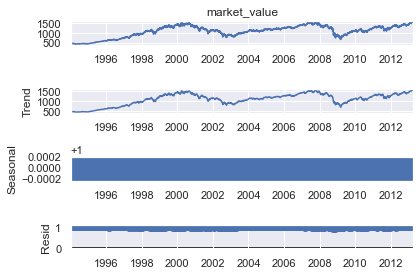

In [43]:
s_dec_additive = seasonal_decompose(df.market_value, model = "multiplicative")
s_dec_additive.plot()
plt.show()

## ACF

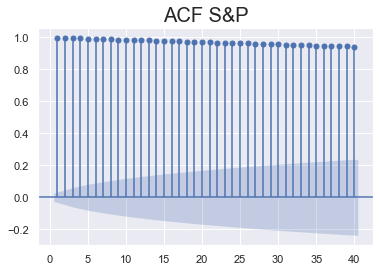

In [44]:
sgt.plot_acf(df.market_value, lags= 40, zero= False)
plt.title("ACF S&P", size=20)
plt.show()

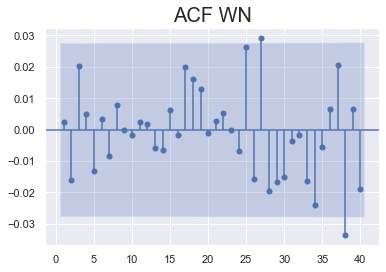

In [45]:
sgt.plot_acf(df.wn, lags= 40, zero= False)
plt.title("ACF WN", size=20)
plt.show()

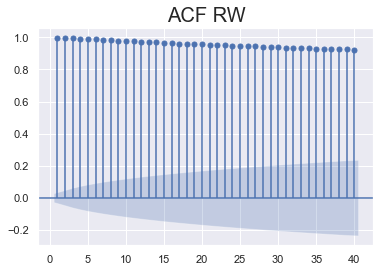

In [46]:
sgt.plot_acf(df.rw, lags= 40, zero= False)
plt.title("ACF RW", size=20)
plt.show()

## PACF

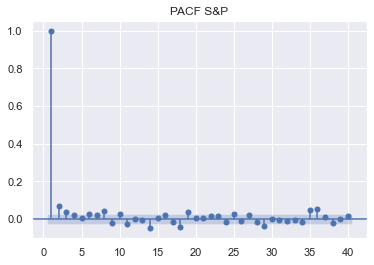

In [47]:
sgt.plot_pacf(df.market_value, lags = 40, zero= False, method = ("ols"))
plt.title("PACF S&P")
plt.show()

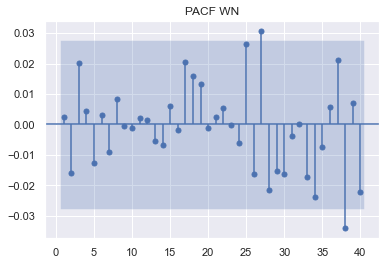

In [48]:
sgt.plot_pacf(df.wn, lags = 40, zero= False, method = ("ols"))
plt.title("PACF WN")
plt.show()

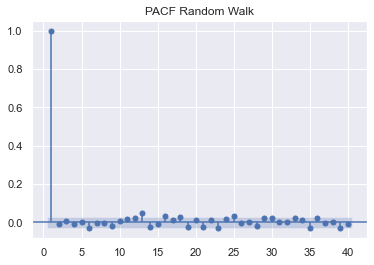

In [49]:
sgt.plot_pacf(df.rw, lags = 40, zero= False, method = ("ols"))
plt.title("PACF Random Walk")
plt.show()

## Analysing FTSE

In [50]:
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
df_comp.set_index('date', inplace=True)
df_comp = df_comp.asfreq('b')
df_comp.spx = df_comp.spx.fillna(method = "ffill")
df_comp.ftse = df_comp.ftse.fillna(method = "bfill")
df_comp.dax = df_comp.dax.fillna(value = df_comp.dax.mean())
df_comp.nikkei = df_comp.nikkei.fillna(method = "ffill")
df_comp['market_value'] = df_comp.ftse
del df_comp['spx'], df_comp['dax'], df_comp['ftse'], df_comp['nikkei']
df_comp.head()

,market_value
date,
1994-01-07,3445.98
1994-01-10,3440.58
1994-01-11,3413.77
1994-01-12,3372.02
1994-01-13,3360.01


In [51]:
df = df_comp

## The AR(1) Model

In [52]:
model_AR = ARMA(df.market_value, order = [1,0])

In [53]:
results_AR = model_AR.fit()

In [54]:
results_AR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6277
Model:                     ARMA(1, 0)   Log Likelihood              -34438.144
Method:                       css-mle   S.D. of innovations             58.379
Date:                Wed, 15 Jun 2022   AIC                          68882.289
Time:                        10:03:12   BIC                          68902.523
Sample:                    01-07-1994   HQIC                         68889.299
                         - 01-29-2018                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5867.7113    939.403      6.246      0.000    4026.515    7708.908
ar.L1.market_value     0.9991      0.001   1449.792      0.000       0.998       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0009           +0.0000j            1.0009            0.0000
-----------------------------------------------------------------------------
"""

In [55]:
## Higher order AR

In [56]:
model_AR_2 = ARMA(df.market_value, order = [2,0])
results_AR_2 = model_AR_2.fit()
results_AR_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6277
Model:                     ARMA(2, 0)   Log Likelihood              -34437.868
Method:                       css-mle   S.D. of innovations             58.377
Date:                Wed, 15 Jun 2022   AIC                          68883.736
Time:                        10:03:13   BIC                          68910.714
Sample:                    01-07-1994   HQIC                         68893.083
                         - 01-29-2018                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5785.7822    835.237      6.927      0.000    4148.748    7422.816
ar.L1.market_value     0.9908      0.013     78.872      0.000       0.966       1.015
ar.L2.market_value     0.0083      0.013      0.664      0.506      -0.016       0.033
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0009           +0.0000j            1.0009            0.0000
AR.2         -119.6685           +0.0000j          119.6685            0.5000
-----------------------------------------------------------------------------
"""

In [57]:
model_AR_3 = ARMA(df.market_value, order = [3,0])
results_AR_3 = model_AR_3.fit()
results_AR_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6277
Model:                     ARMA(3, 0)   Log Likelihood              -34430.458
Method:                       css-mle   S.D. of innovations             58.308
Date:                Wed, 15 Jun 2022   AIC                          68870.917
Time:                        10:03:13   BIC                          68904.640
Sample:                    01-07-1994   HQIC                         68882.601
                         - 01-29-2018                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5423.6913    708.060      7.660      0.000    4035.920    6811.463
ar.L1.market_value     0.9903      0.013     78.923      0.000       0.966       1.015
ar.L2.market_value    -0.0394      0.018     -2.227      0.026      -0.074      -0.005
ar.L3.market_value     0.0482      0.013      3.823      0.000       0.023       0.073
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0008           -0.0000j            1.0008           -0.0000
AR.2           -0.0914           -4.5516j            4.5525           -0.2532
AR.3           -0.0914           +4.5516j            4.5525            0.2532
-----------------------------------------------------------------------------
"""

In [58]:
model_AR_4 = ARMA(df.market_value, order = [4,0])
results_AR_4 = model_AR_4.fit()
results_AR_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 6277
Model:                     ARMA(4, 0)   Log Likelihood              -34421.723
Method:                       css-mle   S.D. of innovations             58.227
Date:                Wed, 15 Jun 2022   AIC                          68855.446
Time:                        10:03:14   BIC                          68895.914
Sample:                    01-07-1994   HQIC                         68869.468
                         - 01-29-2018                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5423.6910    757.033      7.164      0.000    3939.933    6907.449
ar.L1.market_value     0.9878      0.013     78.888      0.000       0.963       1.012
ar.L2.market_value    -0.0374      0.018     -2.114      0.035      -0.072      -0.003
ar.L3.market_value    -0.0040      0.018     -0.225      0.822      -0.039       0.031
ar.L4.market_value     0.0527      0.013      4.183      0.000       0.028       0.077
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0007           -0.0000j            1.0007           -0.0000
AR.2            1.0287           -2.3012j            2.5206           -0.1831
AR.3            1.0287           +2.3012j            2.5206            0.1831
AR.4           -2.9825           -0.0000j            2.9825           -0.5000
-----------------------------------------------------------------------------
"""

## LLR Test

In [59]:
def LLR_test(mod1,mod2,DF=1):
    L1 = mod1.fit().llf
    L2 = mod2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR,DF).round(3)
    
    return p    

## Comapring Higher lag - AR Models 

In [60]:
LLR_test(model_AR_2,model_AR_3)

0.0

In [61]:
LLR_test(model_AR_3,model_AR_4)

0.0

In [62]:
model_AR_4 = ARMA(df.market_value, order = [4,0])
results_AR_4 = model_AR_4.fit()
print(results_AR_4.summary())
print("LLR:" + str(LLR_test(model_AR_3,model_AR_4)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 6277
Model:                     ARMA(4, 0)   Log Likelihood              -34421.723
Method:                       css-mle   S.D. of innovations             58.227
Date:                Wed, 15 Jun 2022   AIC                          68855.446
Time:                        10:03:18   BIC                          68895.914
Sample:                    01-07-1994   HQIC                         68869.468
                         - 01-29-2018                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5423.6910    757.033      7.164      0.000    3939.933    6907.449
ar.L1.market_value     0.9878      0.013     78.888      0.000       0.963       1.012
ar.L2.market_value  

In [63]:
model_AR_5 = ARMA(df.market_value, order = [5,0])
results_AR_5 = model_AR_5.fit()
print(results_AR_5.summary())
print("LLR:" + str(LLR_test(model_AR_4,model_AR_5)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 6277
Model:                     ARMA(5, 0)   Log Likelihood              -34421.466
Method:                       css-mle   S.D. of innovations             58.224
Date:                Wed, 15 Jun 2022   AIC                          68856.933
Time:                        10:03:28   BIC                          68904.145
Sample:                    01-07-1994   HQIC                         68873.291
                         - 01-29-2018                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5423.6909    748.251      7.248      0.000    3957.145    6890.236
ar.L1.market_value     0.9883      0.013     78.790      0.000       0.964       1.013
ar.L2.market_value  

In [64]:
model_AR_6 = ARMA(df.market_value, order = [6,0])
results_AR_6 = model_AR_6.fit()
print(results_AR_6.summary())
print("LLR:" + str(LLR_test(model_AR_5,model_AR_6)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 6277
Model:                     ARMA(6, 0)   Log Likelihood              -34416.725
Method:                       css-mle   S.D. of innovations             58.180
Date:                Wed, 15 Jun 2022   AIC                          68849.449
Time:                        10:03:33   BIC                          68903.407
Sample:                    01-07-1994   HQIC                         68868.145
                         - 01-29-2018                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5423.6908    786.518      6.896      0.000    3882.144    6965.238
ar.L1.market_value     0.9886      0.013     79.021      0.000       0.964       1.013
ar.L2.market_value  

In [65]:
model_AR_7 = ARMA(df.market_value, order = [7,0])
results_AR_7 = model_AR_7.fit()
print(results_AR_7.summary())
print("LLR:" + str(LLR_test(model_AR_6,model_AR_7)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 6277
Model:                     ARMA(7, 0)   Log Likelihood              -34414.381
Method:                       css-mle   S.D. of innovations             58.158
Date:                Wed, 15 Jun 2022   AIC                          68846.761
Time:                        10:03:45   BIC                          68907.463
Sample:                    01-07-1994   HQIC                         68867.793
                         - 01-29-2018                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5423.6912    814.733      6.657      0.000    3826.844    7020.538
ar.L1.market_value     0.9876      0.012     79.036      0.000       0.963       1.012
ar.L2.market_value  

In [66]:
model_AR_8 = ARMA(df.market_value, order = [8,0])
results_AR_8 = model_AR_8.fit()
print(results_AR_8.summary())
print("LLR:" + str(LLR_test(model_AR_7,model_AR_8)))

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 6277
Model:                     ARMA(8, 0)   Log Likelihood              -34414.345
Method:                       css-mle   S.D. of innovations             58.158
Date:                Wed, 15 Jun 2022   AIC                          68848.690
Time:                        10:03:51   BIC                          68916.136
Sample:                    01-07-1994   HQIC                         68872.059
                         - 01-29-2018                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5423.6910    811.145      6.686      0.000    3833.875    7013.506
ar.L1.market_value     0.9876      0.013     78.997      0.000       0.963       1.012
ar.L2.market_value  

In [67]:
print("LLR:" + str(LLR_test(model_AR,model_AR_7)))

LLR:0.0


## The Dickey Fuller Test

In [68]:
sts.adfuller(df.market_value)

(-1.598833621962051,
 0.4841793579044611,
 6,
 6270,
 {'1%': -3.4313933778649943,
  '5%': -2.862001080749219,
  '10%': -2.567015430304048},
 68477.33735716512)

## Returns

In [69]:
df['returns'] = df.market_value.pct_change(1).mul(100)
df = df.iloc[1:]

In [70]:
sts.adfuller(df.returns)

(-15.139421215023129,
 7.045534847763332e-28,
 33,
 6242,
 {'1%': -3.4313980601154883,
  '5%': -2.8620031495251346,
  '10%': -2.567016531562964},
 19028.497135210317)

## ACF and PACF for Returns

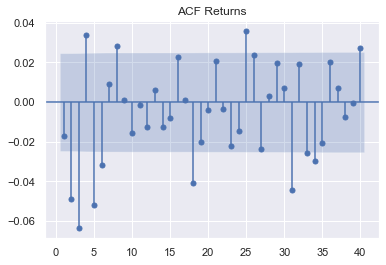

In [71]:
sgt.plot_acf(df.returns, lags = 40, zero= False)
plt.title("ACF Returns")
plt.show()

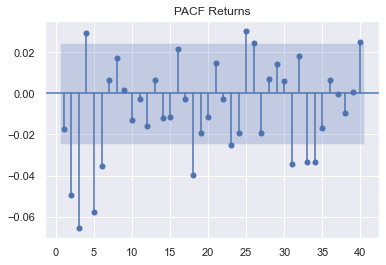

In [72]:
sgt.plot_pacf(df.returns, lags = 40, zero= False, method = ("ols"))
plt.title("PACF Returns")
plt.show()

## AR(1) for Returns

In [73]:
model_ret_AR_1 = ARMA(df.returns, order = [1,0])
results_ret_AR_1 = model_ret_AR_1.fit() 
results_ret_AR_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(1, 0)   Log Likelihood               -9597.738
Method:                       css-mle   S.D. of innovations              1.117
Date:                Wed, 15 Jun 2022   AIC                          19201.477
Time:                        10:04:00   BIC                          19221.710
Sample:                    01-10-1994   HQIC                         19208.487
                         - 01-29-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.014      1.371      0.170      -0.008       0.046
ar.L1.returns    -0.0173      0.013     -1.370      0.171      -0.042       0.007
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -57.8558           +0.0000j           57.8558            0.5000
-----------------------------------------------------------------------------
"""

## Higher Lag Models for AR Returns

In [74]:
model_ret_AR_2 = ARMA(df.returns, order = [2,0])
results_ret_AR_2 = model_ret_AR_2.fit() 
results_ret_AR_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(2, 0)   Log Likelihood               -9590.077
Method:                       css-mle   S.D. of innovations              1.115
Date:                Wed, 15 Jun 2022   AIC                          19188.154
Time:                        10:04:00   BIC                          19215.132
Sample:                    01-10-1994   HQIC                         19197.502
                         - 01-29-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.013      1.440      0.150      -0.007       0.045
ar.L1.returns    -0.0181      0.013     -1.439      0.150      -0.043       0.007
ar.L2.returns    -0.0494      0.013     -3.917      0.000      -0.074      -0.025
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.1837           -4.4965j            4.5003           -0.2565
AR.2           -0.1837           +4.4965j            4.5003            0.2565
-----------------------------------------------------------------------------
"""

In [75]:
LLR_test(model_ret_AR_1, model_ret_AR_2)

0.0

In [76]:
model_ret_AR_3 = ARMA(df.returns, order = [3,0])
results_ret_AR_3 = model_ret_AR_3.fit() 
results_ret_AR_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(3, 0)   Log Likelihood               -9576.486
Method:                       css-mle   S.D. of innovations              1.113
Date:                Wed, 15 Jun 2022   AIC                          19162.972
Time:                        10:04:01   BIC                          19196.695
Sample:                    01-10-1994   HQIC                         19174.656
                         - 01-29-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.012      1.540      0.124      -0.005       0.043
ar.L1.returns    -0.0214      0.013     -1.698      0.089      -0.046       0.003
ar.L2.returns    -0.0506      0.013     -4.020      0.000      -0.075      -0.026
ar.L3.returns    -0.0657      0.013     -5.219      0.000      -0.090      -0.041
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9725           -2.1584j            2.3674           -0.1826
AR.2            0.9725           +2.1584j            2.3674            0.1826
AR.3           -2.7143           -0.0000j            2.7143           -0.5000
-----------------------------------------------------------------------------
"""

In [77]:
LLR_test(model_ret_AR_2, model_ret_AR_3)

0.0

In [78]:
model_ret_AR_4 = ARMA(df.returns, order = [4,0])
results_ret_AR_4 = model_ret_AR_4.fit() 
results_ret_AR_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(4, 0)   Log Likelihood               -9573.807
Method:                       css-mle   S.D. of innovations              1.112
Date:                Wed, 15 Jun 2022   AIC                          19159.613
Time:                        10:04:01   BIC                          19200.080
Sample:                    01-10-1994   HQIC                         19173.634
                         - 01-29-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.013      1.494      0.135      -0.006       0.044
ar.L1.returns    -0.0195      0.013     -1.543      0.123      -0.044       0.005
ar.L2.returns    -0.0491      0.013     -3.899      0.000      -0.074      -0.024
ar.L3.returns    -0.0651      0.013     -5.170      0.000      -0.090      -0.040
ar.L4.returns     0.0292      0.013      2.315      0.021       0.004       0.054
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.1026           -0.0000j            2.1026           -0.5000
AR.2            0.3988           -2.1091j            2.1465           -0.2203
AR.3            0.3988           +2.1091j            2.1465            0.2203
AR.4            3.5335           -0.0000j            3.5335           -0.0000
-----------------------------------------------------------------------------
"""

In [79]:
LLR_test(model_ret_AR_3, model_ret_AR_4)

0.021

In [80]:
model_ret_AR_5 = ARMA(df.returns, order = [5,0])
results_ret_AR_5 = model_ret_AR_5.fit() 
results_ret_AR_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(5, 0)   Log Likelihood               -9563.340
Method:                       css-mle   S.D. of innovations              1.111
Date:                Wed, 15 Jun 2022   AIC                          19140.679
Time:                        10:04:02   BIC                          19187.890
Sample:                    01-10-1994   HQIC                         19157.037
                         - 01-29-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.012      1.584      0.113      -0.005       0.043
ar.L1.returns    -0.0178      0.013     -1.411      0.158      -0.042       0.007
ar.L2.returns    -0.0529      0.013     -4.196      0.000      -0.078      -0.028
ar.L3.returns    -0.0679      0.013     -5.397      0.000      -0.093      -0.043
ar.L4.returns     0.0281      0.013      2.229      0.026       0.003       0.053
ar.L5.returns    -0.0577      0.013     -4.579      0.000      -0.082      -0.033
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.6143           -0.0000j            1.6143           -0.5000
AR.2           -0.3540           -1.7411j            1.7767           -0.2819
AR.3           -0.3540           +1.7411j            1.7767            0.2819
AR.4            1.4045           -1.1951j            1.8441           -0.1122
AR.5            1.4045           +1.1951j            1.8441            0.1122
-----------------------------------------------------------------------------
"""

In [81]:
LLR_test(model_ret_AR_4, model_ret_AR_5)

0.0

In [82]:
model_ret_AR_6 = ARMA(df.returns, order = [6,0])
results_ret_AR_6 = model_ret_AR_6.fit() 
results_ret_AR_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(6, 0)   Log Likelihood               -9559.401
Method:                       css-mle   S.D. of innovations              1.110
Date:                Wed, 15 Jun 2022   AIC                          19134.802
Time:                        10:04:03   BIC                          19188.758
Sample:                    01-10-1994   HQIC                         19153.497
                         - 01-29-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.012      1.642      0.100      -0.004       0.042
ar.L1.returns    -0.0198      0.013     -1.571      0.116      -0.045       0.005
ar.L2.returns    -0.0519      0.013     -4.117      0.000      -0.077      -0.027
ar.L3.returns    -0.0703      0.013     -5.578      0.000      -0.095      -0.046
ar.L4.returns     0.0262      0.013      2.079      0.038       0.002       0.051
ar.L5.returns    -0.0583      0.013     -4.632      0.000      -0.083      -0.034
ar.L6.returns    -0.0354      0.013     -2.807      0.005      -0.060      -0.011
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3040           -0.9350j            1.6046           -0.0990
AR.2            1.3040           +0.9350j            1.6046            0.0990
AR.3           -0.1174           -1.5982j            1.6025           -0.2617
AR.4           -0.1174           +1.5982j            1.6025            0.2617
AR.5           -2.0103           -0.4793j            2.0667           -0.4628
AR.6           -2.0103           +0.4793j            2.0667            0.4628
-----------------------------------------------------------------------------
"""

In [83]:
LLR_test(model_ret_AR_5, model_ret_AR_6)

0.005

In [84]:
model_ret_AR_7 = ARMA(df.returns, order = [7,0])
results_ret_AR_7 = model_ret_AR_7.fit() 
results_ret_AR_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 6276
Model:                     ARMA(7, 0)   Log Likelihood               -9559.270
Method:                       css-mle   S.D. of innovations              1.110
Date:                Wed, 15 Jun 2022   AIC                          19136.540
Time:                        10:04:05   BIC                          19197.240
Sample:                    01-10-1994   HQIC                         19157.571
                         - 01-29-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0190      0.012      1.632      0.103      -0.004       0.042
ar.L1.returns    -0.0196      0.013     -1.552      0.121      -0.044       0.005
ar.L2.returns    -0.0515      0.013     -4.080      0.000      -0.076      -0.027
ar.L3.returns    -0.0705      0.013     -5.590      0.000      -0.095      -0.046
ar.L4.returns     0.0267      0.013      2.110      0.035       0.002       0.051
ar.L5.returns    -0.0580      0.013     -4.599      0.000      -0.083      -0.033
ar.L6.returns    -0.0353      0.013     -2.797      0.005      -0.060      -0.011
ar.L7.returns     0.0065      0.013      0.512      0.608      -0.018       0.031
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2965           -0.9876j            1.6298           -0.1036
AR.2            1.2965           +0.9876j            1.6298            0.1036
AR.3           -0.1526           -1.5643j            1.5718           -0.2655
AR.4           -0.1526           +1.5643j            1.5718            0.2655
AR.5           -1.7848           -0.5587j            1.8702           -0.4517
AR.6           -1.7848           +0.5587j            1.8702            0.4517
AR.7            6.7384           -0.0000j            6.7384           -0.0000
-----------------------------------------------------------------------------
"""

In [85]:
LLR_test(model_ret_AR_6, model_ret_AR_7)

0.608

In [86]:
# Model fails on AR-7 hence we go with AR-6

## Normalizing Values

In [87]:
benchmark = df.market_value.iloc[0]

In [88]:
df['norm'] = df.market_value.div(benchmark).mul(100)

In [89]:
sts.adfuller(df.norm)

(-1.5881426545228468,
 0.4895470797129275,
 6,
 6269,
 {'1%': -3.4313935443677157,
  '5%': -2.8620011543157835,
  '10%': -2.5670154694652805},
 24303.224567262256)

In [90]:
bench_ret = df.returns.iloc[0]
df['norm_ret'] = df.returns.div(bench_ret).mul(100)
sts.adfuller(df.norm_ret)

(-15.139421215023118,
 7.045534847763736e-28,
 33,
 6242,
 {'1%': -3.4313980601154883,
  '5%': -2.8620031495251346,
  '10%': -2.567016531562964},
 99644.30121721487)

In [91]:
# Normalizing does not affect Stationarity

## Normalizing Returns

In [92]:
model_norm_ret_AR_1 = ARMA(df.norm_ret, order= [1,0])
results_norm_ret_AR_1 = model_norm_ret_AR_1.fit()
results_norm_ret_AR_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 6276
Model:                     ARMA(1, 0)   Log Likelihood              -50131.690
Method:                       css-mle   S.D. of innovations            712.587
Date:                Wed, 15 Jun 2022   AIC                         100269.380
Time:                        10:04:07   BIC                         100289.614
Sample:                    01-10-1994   HQIC                        100276.391
                         - 01-29-2018                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -12.1199      8.842     -1.371      0.170     -29.450       5.210
ar.L1.norm_ret    -0.0173      0.013     -1.370      0.171      -0.042       0.007
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -57.8566           +0.0000j           57.8566            0.5000
-----------------------------------------------------------------------------
"""

In [93]:
model_norm_ret_AR_2 = ARMA(df.norm_ret, order= [2,0])
results_norm_ret_AR_2 = model_norm_ret_AR_2.fit()
results_norm_ret_AR_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 6276
Model:                     ARMA(2, 0)   Log Likelihood              -50124.029
Method:                       css-mle   S.D. of innovations            711.718
Date:                Wed, 15 Jun 2022   AIC                         100256.058
Time:                        10:04:07   BIC                         100283.036
Sample:                    01-10-1994   HQIC                        100265.405
                         - 01-29-2018                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -12.1199      8.416     -1.440      0.150     -28.615       4.375
ar.L1.norm_ret    -0.0181      0.013     -1.439      0.150      -0.043       0.007
ar.L2.norm_ret    -0.0494      0.013     -3.917      0.000      -0.074      -0.025
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.1837           -4.4965j            4.5003           -0.2565
AR.2           -0.1837           +4.4965j            4.5003            0.2565
-----------------------------------------------------------------------------
"""

In [94]:
model_norm_ret_AR_7 = ARMA(df.norm_ret, order= [7,0])
results_norm_ret_AR_7 = model_norm_ret_AR_7.fit()
results_norm_ret_AR_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 6276
Model:                     ARMA(7, 0)   Log Likelihood              -50093.222
Method:                       css-mle   S.D. of innovations            708.230
Date:                Wed, 15 Jun 2022   AIC                         100204.443
Time:                        10:04:08   BIC                         100265.144
Sample:                    01-10-1994   HQIC                        100225.475
                         - 01-29-2018                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -12.1199      7.440     -1.629      0.103     -26.702       2.462
ar.L1.norm_ret    -0.0196      0.013     -1.552      0.121      -0.044       0.005
ar.L2.norm_ret    -0.0515      0.013     -4.080      0.000      -0.076      -0.027
ar.L3.norm_ret    -0.0705      0.013     -5.590      0.000      -0.095      -0.046
ar.L4.norm_ret     0.0267      0.013      2.110      0.035       0.002       0.051
ar.L5.norm_ret    -0.0580      0.013     -4.599      0.000      -0.083      -0.033
ar.L6.norm_ret    -0.0353      0.013     -2.797      0.005      -0.060      -0.011
ar.L7.norm_ret     0.0065      0.013      0.512      0.608      -0.018       0.031
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2965           -0.9876j            1.6298           -0.1036
AR.2            1.2965           +0.9876j            1.6298            0.1036
AR.3           -0.1526           -1.5643j            1.5718           -0.2655
AR.4           -0.1526           +1.5643j            1.5718            0.2655
AR.5           -1.7848           -0.5587j            1.8702           -0.4517
AR.6           -1.7848           +0.5587j            1.8702            0.4517
AR.7            6.7384           -0.0000j            6.7384           -0.0000
-----------------------------------------------------------------------------
"""

In [95]:
# Using Normalized values has no effect on Model Selection

## Analysing the residuals

In [96]:
df['res_price'] = results_AR_7.resid

In [97]:
df.res_price.mean()

0.7921104904490027

In [98]:
df.res_price.var()

3381.766183053264

In [99]:
sts.adfuller(df.res_price)

(-79.22251922620579,
 0.0,
 0,
 6275,
 {'1%': -3.431392546147741,
  '5%': -2.8620007132681926,
  '10%': -2.567015234685164},
 68455.64290951048)

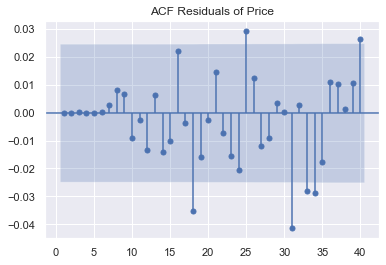

In [100]:
sgt.plot_acf(df.res_price, lags = 40, zero= False)
plt.title("ACF Residuals of Price")
plt.show()

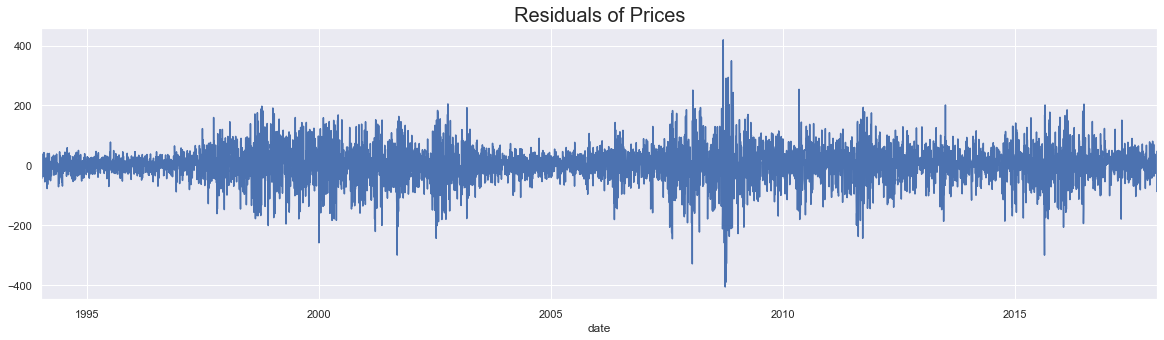

In [101]:
df.res_price[1:].plot(figsize = (20,5))
plt.title("Residuals of Prices", size = 20)
plt.show()

In [102]:
df['res_ret'] = results_ret_AR_6.resid

In [103]:
df.res_ret.mean()

-4.057305536985109e-05

In [104]:
df.res_ret.var()

1.231969927566804

In [105]:
sts.adfuller(df.res_ret)

(-15.00130543318467,
 1.0888038973987403e-27,
 33,
 6242,
 {'1%': -3.4313980601154883,
  '5%': -2.8620031495251346,
  '10%': -2.567016531562964},
 19029.83977836064)

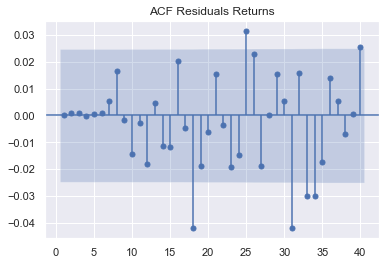

In [106]:
sgt.plot_acf(df.res_ret, lags = 40, zero= False)
plt.title("ACF Residuals Returns")
plt.show()

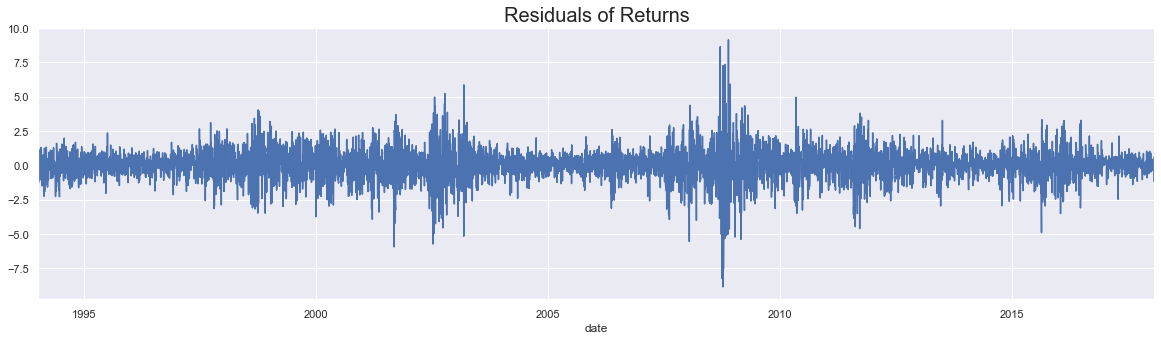

In [107]:
df.res_ret[1:].plot(figsize = (20,5))
plt.title("Residuals of Returns", size = 20)
plt.show()

# Moving Average

In [108]:
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
df_comp.set_index('date', inplace=True)
df_comp = df_comp.asfreq('b')
df_comp.spx = df_comp.spx.fillna(method = "ffill")
df_comp.ftse = df_comp.ftse.fillna(method = "ffill")
df_comp.dax = df_comp.dax.fillna(value = df_comp.dax.mean())
df_comp.nikkei = df_comp.nikkei.fillna(method = "ffill")
df_comp['market_value'] = df_comp.ftse
del df_comp['spx'], df_comp['dax'], df_comp['ftse'], df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]
df_comp.head()

,market_value
date,
1994-01-07,3445.98
1994-01-10,3440.58
1994-01-11,3413.77
1994-01-12,3372.02
1994-01-13,3360.01


In [109]:
df['returns'] = df.market_value.pct_change(1)*100

In [110]:
df

,market_value,returns
date,,
1994-01-07,3445.98,NaN
1994-01-10,3440.58,-0.156704
1994-01-11,3413.77,-0.779229
1994-01-12,3372.02,-1.222988
1994-01-13,3360.01,-0.356166
...,...,...
2013-04-01,6411.74,0.000000
2013-04-02,6490.66,1.230867
2013-04-03,6420.28,-1.084327


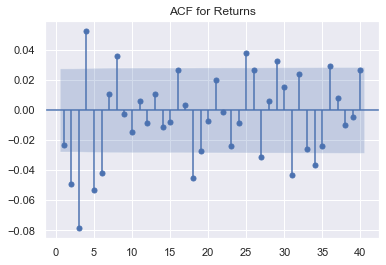

In [111]:
sgt.plot_acf(df.returns[1:], lags = 40, zero= False)
plt.title("ACF for Returns")
plt.show()

## MA(1) for Returns

In [112]:
model_ret_MA_1 = ARMA(df.returns[1:], order = [0,1])
results_ret_MA_1 = model_ret_MA_1.fit()
results_ret_MA_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 1)   Log Likelihood               -7929.595
Method:                       css-mle   S.D. of innovations              1.174
Date:                Wed, 15 Jun 2022   AIC                          15865.190
Time:                        10:04:11   BIC                          15884.754
Sample:                    01-10-1994   HQIC                         15872.045
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.162      0.245      -0.013       0.050
ma.L1.returns    -0.0257      0.015     -1.720      0.085      -0.055       0.004
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           38.8549           +0.0000j           38.8549            0.0000
-----------------------------------------------------------------------------
"""

## Higher order MA Models

In [113]:
model_ret_MA_2 = ARMA(df.returns[1:], order = [0,2])
results_ret_MA_2 = model_ret_MA_2.fit()
print(results_ret_MA_2.summary())
print("\nLLR test p-value: " + str(LLR_test(model_ret_MA_1,model_ret_MA_2)) )

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 2)   Log Likelihood               -7922.864
Method:                       css-mle   S.D. of innovations              1.173
Date:                Wed, 15 Jun 2022   AIC                          15853.728
Time:                        10:04:11   BIC                          15879.812
Sample:                    01-10-1994   HQIC                         15862.868
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.239      0.215      -0.011       0.049
ma.L1.returns    -0.0327      0.014     -2.297      0.022      -0.061      -0.005
ma.L2.returns    -0.0502      0.014     

In [114]:
model_ret_MA_3 = ARMA(df.returns[1:], order = [0,3])
results_ret_MA_3 = model_ret_MA_3.fit()
print(results_ret_MA_3.summary())
print("\nLLR test p-value: " + str(LLR_test(model_ret_MA_2,model_ret_MA_3)) )

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 3)   Log Likelihood               -7904.317
Method:                       css-mle   S.D. of innovations              1.168
Date:                Wed, 15 Jun 2022   AIC                          15818.634
Time:                        10:04:11   BIC                          15851.240
Sample:                    01-10-1994   HQIC                         15830.060
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.376      0.169      -0.008       0.046
ma.L1.returns    -0.0203      0.014     -1.423      0.155      -0.048       0.008
ma.L2.returns    -0.0556      0.013     

In [115]:
model_ret_MA_4 = ARMA(df.returns[1:], order = [0,4])
results_ret_MA_4 = model_ret_MA_4.fit()
print(results_ret_MA_4.summary())
print("\nLLR test p-value: " + str(LLR_test(model_ret_MA_3,model_ret_MA_4)) )

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 4)   Log Likelihood               -7898.773
Method:                       css-mle   S.D. of innovations              1.167
Date:                Wed, 15 Jun 2022   AIC                          15809.547
Time:                        10:04:13   BIC                          15848.674
Sample:                    01-10-1994   HQIC                         15823.257
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.305      0.192      -0.009       0.047
ma.L1.returns    -0.0203      0.014     -1.443      0.149      -0.048       0.007
ma.L2.returns    -0.0551      0.014     

In [116]:
model_ret_MA_5 = ARMA(df.returns[1:], order = [0,5])
results_ret_MA_5 = model_ret_MA_5.fit()
print(results_ret_MA_5.summary())
print("\nLLR test p-value: " + str(LLR_test(model_ret_MA_4,model_ret_MA_5)) )

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 5)   Log Likelihood               -7892.823
Method:                       css-mle   S.D. of innovations              1.166
Date:                Wed, 15 Jun 2022   AIC                          15799.645
Time:                        10:04:14   BIC                          15845.294
Sample:                    01-10-1994   HQIC                         15815.641
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.376      0.169      -0.008       0.046
ma.L1.returns    -0.0262      0.014     -1.851      0.064      -0.054       0.002
ma.L2.returns    -0.0497      0.014     

In [117]:
model_ret_MA_6 = ARMA(df.returns[1:], order = [0,6])
results_ret_MA_6 = model_ret_MA_6.fit()
print(results_ret_MA_6.summary())
print("\nLLR test p-value: " + str(LLR_test(model_ret_MA_5,model_ret_MA_6)) )

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 6)   Log Likelihood               -7889.221
Method:                       css-mle   S.D. of innovations              1.165
Date:                Wed, 15 Jun 2022   AIC                          15794.442
Time:                        10:04:17   BIC                          15846.612
Sample:                    01-10-1994   HQIC                         15812.723
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.430      0.153      -0.007       0.045
ma.L1.returns    -0.0237      0.014     -1.682      0.093      -0.051       0.004
ma.L2.returns    -0.0486      0.014     

In [118]:
model_ret_MA_7 = ARMA(df.returns[1:], order = [0,7])
results_ret_MA_7 = model_ret_MA_7.fit()
print(results_ret_MA_7.summary())
print("\nLLR test p-value: " + str(LLR_test(model_ret_MA_6,model_ret_MA_7)) )

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 7)   Log Likelihood               -7889.046
Method:                       css-mle   S.D. of innovations              1.165
Date:                Wed, 15 Jun 2022   AIC                          15796.091
Time:                        10:04:22   BIC                          15854.782
Sample:                    01-10-1994   HQIC                         15816.657
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.418      0.156      -0.007       0.045
ma.L1.returns    -0.0247      0.014     -1.739      0.082      -0.052       0.003
ma.L2.returns    -0.0488      0.014     

In [119]:
model_ret_MA_8 = ARMA(df.returns[1:], order = [0,8])
results_ret_MA_8 = model_ret_MA_8.fit()
print(results_ret_MA_8.summary())
print("\nLLR test p-value: " + str(LLR_test(model_ret_MA_7,model_ret_MA_8)) )

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 8)   Log Likelihood               -7885.603
Method:                       css-mle   S.D. of innovations              1.164
Date:                Wed, 15 Jun 2022   AIC                          15791.205
Time:                        10:04:28   BIC                          15856.417
Sample:                    01-10-1994   HQIC                         15814.056
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.364      0.173      -0.008       0.046
ma.L1.returns    -0.0238      0.014     -1.688      0.091      -0.051       0.004
ma.L2.returns    -0.0495      0.014     

In [120]:
LLR_test(model_ret_MA_6,model_ret_MA_8, DF = 2)

0.027

## Residuals

In [121]:
df['res_ret_MA_8'] = results_ret_MA_8.resid[1:]

In [122]:
print("The mean of the residuals is: " + str(round(df.res_ret_MA_8.mean(),3)))
print("The variance of the residuals is: " + str(round(df.res_ret_MA_8.var(),3)))
print("The standard deviation of the residuals is: " + str(round(df.res_ret_MA_8.std(),3)))

The mean of the residuals is: -0.0
The variance of the residuals is: 1.356
The standard deviation of the residuals is: 1.164


In [123]:
## Most of the data would be bound between -3 std to + 3 std

3*1.165

# That is between -3.5 to +3.5

3.495

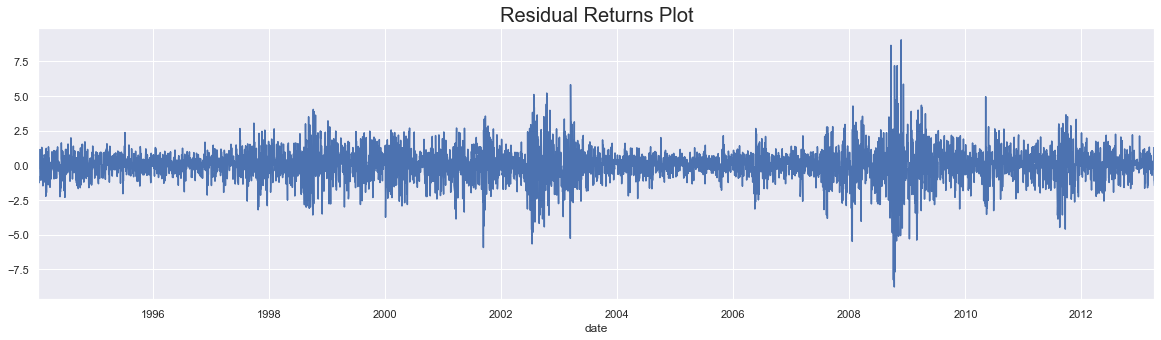

In [124]:
df.res_ret_MA_8[1:].plot(figsize=(20,5))
plt.title("Residual Returns Plot", size = 20)
plt.show()

In [125]:
sts.adfuller(df.res_ret_MA_8[2:])

(-70.83581775117763,
 0.0,
 0,
 5018,
 {'1%': -3.4316538358533277,
  '5%': -2.8621161549128313,
  '10%': -2.567076687880585},
 15684.052185427136)

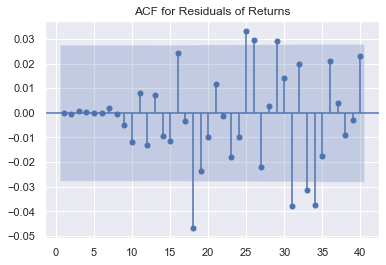

In [126]:
sgt.plot_acf(df.res_ret_MA_8[2:], lags = 40, zero= False)
plt.title("ACF for Residuals of Returns")
plt.show()

## Normalized Returns

In [127]:
bench_ret = df.returns.iloc[1]
df['norm_ret'] = df.returns.div(bench_ret).mul(100)

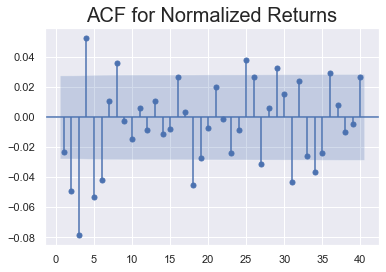

In [128]:
sgt.plot_acf(df.norm_ret[1:], lags = 40, zero= False)
plt.title("ACF for Normalized Returns",size = 20)
plt.show()

In [129]:
model_norm_ret_MA_8 = ARMA(df.norm_ret[1:], order = [0,8])
results_norm_ret_MA_8 = model_norm_ret_MA_8.fit()
print(results_ret_MA_8.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 8)   Log Likelihood               -7885.603
Method:                       css-mle   S.D. of innovations              1.164
Date:                Wed, 15 Jun 2022   AIC                          15791.205
Time:                        10:04:42   BIC                          15856.417
Sample:                    01-10-1994   HQIC                         15814.056
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.364      0.173      -0.008       0.046
ma.L1.returns    -0.0238      0.014     -1.688      0.091      -0.051       0.004
ma.L2.returns    -0.0495      0.014     

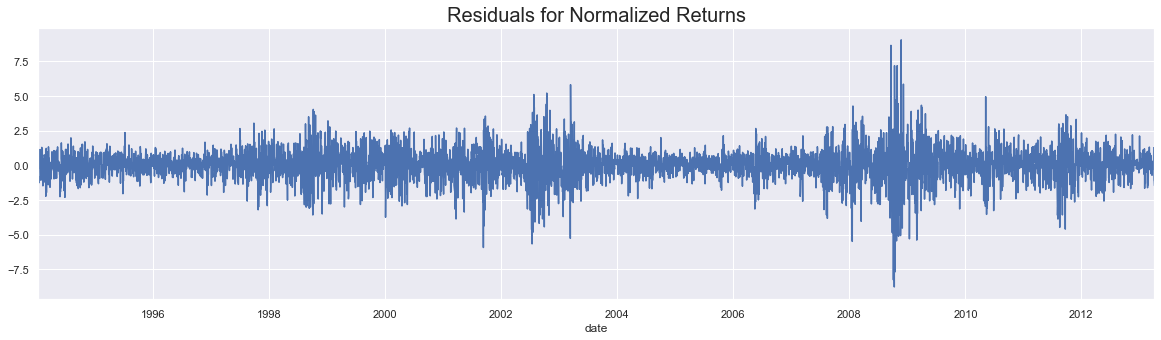

In [130]:
df['res_norm_ret_MA_8'] = results_ret_MA_8.resid[1:]
df.res_norm_ret_MA_8[1:].plot(figsize=(20,5))
plt.title("Residuals for Normalized Returns", size = 20)
plt.show()

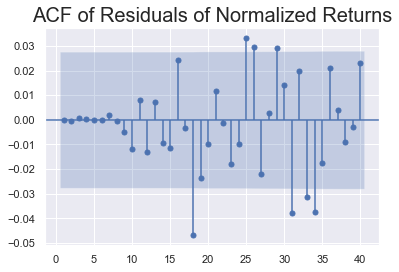

In [131]:
sgt.plot_acf(df.res_norm_ret_MA_8[2:], lags = 40, zero= False)
plt.title("ACF of Residuals of Normalized Returns",size = 20)
plt.show()

## MA models for Prices

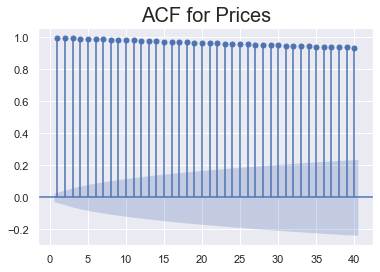

In [132]:
sgt.plot_acf(df.market_value, lags = 40, zero= False)
plt.title("ACF for Prices",size = 20)
plt.show()

In [133]:
model_MA_1 = ARMA(df.market_value, order = [0,1])
results_MA_1 = model_MA_1.fit()
results_MA_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(0, 1)   Log Likelihood              -38629.000
Method:                       css-mle   S.D. of innovations            530.756
Date:                Wed, 15 Jun 2022   AIC                          77264.000
Time:                        10:04:44   BIC                          77283.564
Sample:                    01-07-1994   HQIC                         77270.856
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.5909     14.660    347.187      0.000    5060.859    5118.323
ma.L1.market_value     0.9573      0.003    335.560      0.000       0.952       0.963
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0446           +0.0000j            1.0446            0.5000
-----------------------------------------------------------------------------
"""

## ARMA(1,1)

In [134]:
model_ret_AR_1_MA_1 = ARMA(df.returns[1:], order = [1,1])
results_ret_AR_1_MA_1 = model_ret_AR_1_MA_1.fit()
results_ret_AR_1_MA_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 1)   Log Likelihood               -7916.500
Method:                       css-mle   S.D. of innovations              1.171
Date:                Wed, 15 Jun 2022   AIC                          15841.000
Time:                        10:04:45   BIC                          15867.085
Sample:                    01-10-1994   HQIC                         15850.140
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.446      0.148      -0.007       0.045
ar.L1.returns     0.7649      0.067     11.349      0.000       0.633       0.897
ma.L1.returns    -0.8141      0.061    -13.406      0.000      -0.933      -0.695
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3074           +0.0000j            1.3074            0.0000
MA.1            1.2284           +0.0000j            1.2284            0.0000
-----------------------------------------------------------------------------
"""

In [135]:
LLR_test(model_ret_AR_1, model_ret_AR_1_MA_1)

0.0

In [136]:
LLR_test(model_ret_MA_1, model_ret_AR_1_MA_1)

0.0

### Please feel free to reach out to me at aryashantanu11@gmail.com in case of any queries 